In [1]:
import sys

sys.path.append("../")

In [2]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import speed_of_light
from sergeys_data_paper_code.reconstruction_module import get_noise_detlim, master_recon

from sergeys_data_paper_code.neural_reconstruction import reconstruct_current_profile


In [3]:
def nils_reconstruction(freq, FF_list_crisp):
    ff_mean = np.mean(FF_list_crisp, axis=0)
    ff_mean[ff_mean < 0] = 0
    ff = np.sqrt(ff_mean)

    n_shots = FF_list_crisp.shape[0]
    print(n_shots)

    ff_noise, det_lim = get_noise_detlim(final_ff=ff, charge=250e-12, n_shots=n_shots)
    noise = np.sqrt(np.std(FF_list_crisp, axis=0))
    crisp_recon_time, crisp_recon_current, crisp_t_rms = master_recon(
        freq,
        ff,
        noise,
        det_lim,
        charge=0.25e-9,
        channels_to_remove=[],
        show_plots=False,
    )
    return crisp_recon_time, crisp_recon_current


In [4]:
with open("LH_OFF.pkl", "rb") as f:
    data_lh_off = pickle.load(f)
with open("LH_4000.pkl", "rb") as f:
    data_lh_on = pickle.load(f)
with open("rf_params.pkl", "rb") as f:
    rf_params = pickle.load(f)


In [5]:
rf_param_keys = [
    "XFEL.RF/LLRF.SUMVOLTAGE_CTRL/I1/SUMVOLTAGE.CHIRP.SP.1",
    "XFEL.RF/LLRF.SUMVOLTAGE_CTRL/I1/SUMVOLTAGE.CURVATURE.SP.1",
    "XFEL.RF/LLRF.SUMVOLTAGE_CTRL/I1/SUMVOLTAGE.THIRDDERIVATIVE.SP.1",
    "chirp",
    "XFEL.RF/LLRF.SUMVOLTAGE_CTRL/L2/SUMVOLTAGE.CHIRP.SP.1",
]
rf_settings_list = [
    np.array([chirp, curv, skew, chirpL1, chirpL2])
    for chirp, curv, skew, chirpL1, chirpL2 in zip(
        rf_params["XFEL.RF/LLRF.SUMVOLTAGE_CTRL/I1/SUMVOLTAGE.CHIRP.SP.1"],
        rf_params["XFEL.RF/LLRF.SUMVOLTAGE_CTRL/I1/SUMVOLTAGE.CURVATURE.SP.1"],
        rf_params["XFEL.RF/LLRF.SUMVOLTAGE_CTRL/I1/SUMVOLTAGE.THIRDDERIVATIVE.SP.1"],
        rf_params["chirp"],
        rf_params["XFEL.RF/LLRF.SUMVOLTAGE_CTRL/L2/SUMVOLTAGE.CHIRP.SP.1"],
    )
]

In [6]:
fromfactor_off_list = data_lh_off["FF"]
formfactor_on_list = data_lh_on["FF"]

In [7]:
frequencies = data_lh_off["freq"][0]


50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50


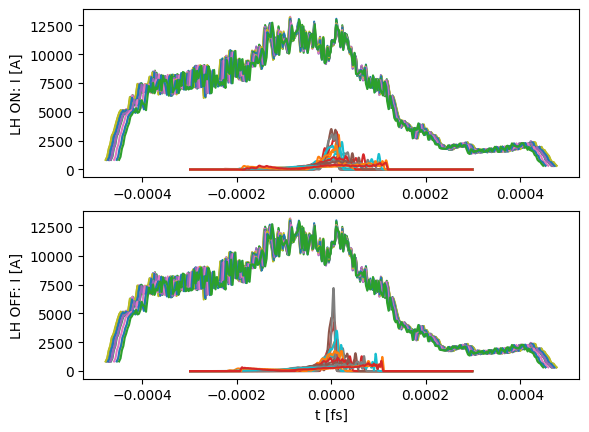

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1)
for i, (rf_settings, formfactor_off, formfactor_on) in enumerate(
    zip(rf_settings_list, fromfactor_off_list, formfactor_on_list)
):
    clean_formfactor_on = np.mean(formfactor_off, axis=0)
    # clean_formfactor_on[clean_formfactor_on < 0] = 0
    # clean_formfactor_on = np.sqrt(clean_formfactor_on)
    ss_on, current_profile_on = reconstruct_current_profile(
        rf_settings, clean_formfactor_on
    )

    recon_time_on, recon_current_on = nils_reconstruction(
        frequencies, FF_list_crisp=formfactor_on
    )

    ax1.plot(ss_on, current_profile_on)
    ax1.plot(recon_time_on * speed_of_light, recon_current_on)

    clean_formfactor_off = np.mean(formfactor_off, axis=0)
    # clean_formfactor_off[clean_formfactor_off < 0] = 0
    # clean_formfactor_off = np.sqrt(clean_formfactor_off)
    ss_off, current_profile_off = reconstruct_current_profile(
        rf_settings, clean_formfactor_off
    )

    recon_time_off, recon_current_off = nils_reconstruction(
        frequencies, FF_list_crisp=formfactor_off
    )

    ax2.plot(ss_off, current_profile_off)
    ax2.plot(recon_time_off * speed_of_light, recon_current_off)

plt.xlabel(
    "t [fs]"
)  # I think this was actually meters because you multiply by speed of light
ax1.set_ylabel("LH ON: I [A]")
ax2.set_ylabel("LH OFF: I [A]")

plt.show()
